# Visual Analytics : Assignment 1   
>#### <font color="#2196F3">Meghna Ramachandra Holla (B00812604) </font>
***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Loading data from CSV file
def load_data():
    path_to_file = "dataset1_dirty.csv"
    data_set = pd.read_csv(path_to_file)
    return data_set

In [3]:
#----Pre-processing of Age Column----
def age_preprocess(dataset):
    
    print(dataset['age'].isnull().sum()) #checking total null values
    print(np.isnan(dataset['age']).sum()) #checking total nan values
    print((dataset['age'].astype(str) != '?').all(axis=0)) #checking if there are '?' characters

    # Histogram for Age distribution before pre-processing, interval = 10
    numeric_histogram(dataset['age'], "Distribution plot of Age before Pre-processing",10,"Age")
        
    #Checking for NaN values and replacing with zero
    if dataset['age'].isnull().sum() != 0 or np.isnan(dataset['age']).sum():
        dataset['age'].fillna(0)
    
    #Replacing ? character with 0
    dataset['age'] = dataset['age'].replace(to_replace='?', value=0)
    
    #Changing negative values to positive
    dataset['age'] = abs(dataset['age'])
    
    #Filling 0 values using forwared filling method
    dataset['age'] = dataset['age'].replace(to_replace=0, method='ffill')  
    
    
    # Histogram for Age distribution after pre-processing, interval = 10
    numeric_histogram(dataset['age'], "Distribution plot of Age after Pre-processing",10,"Age")

    return (dataset) #returning updated dataset


In [4]:
#----Pre-processing of Workclass Column----
def workclass_preprocess(dataset):
    
    # Histogram for Workclass distribution before pre-processing
    categorical_histogram(pd.DataFrame(dataset['workclass']), "Distribution plot of Workclass before Pre-processing",'Workclass')

    dataset = pd.DataFrame(dataset) 
    dataset['workclass'] = dataset['workclass'].replace(to_replace=r"[- ]", value='',regex=True)
    
    #Regex pattern in Dictionary of Workclass 
    work = {'[pP][rivate]{4,6}':"Private",'[fF]ederalgov':"Federal-gov",'[Sself]{3,4}[emp]{2,3}[not]{2,3}[inc]{2,3}':"Self-emp-not-inc",
            '[sSelfempinc]{8,10}':"Self-emp-inc",'[lLocalgov]{6,8}':"Local-gov",'[sStategov]{6,8}':"State-gov",'[wWithoutpay]{8,10}':"Without-pay"}
    
    #Replacing the matched key with value
    for key, value in work.items():
        dataset['workclass'] = dataset['workclass'].replace(to_replace=key, value=value,regex=True)
    
    #Replacing ? character using forward filling
    dataset['workclass'] = dataset['workclass'].replace(to_replace='?', method='ffill')
    
    # Histogram for Workclass distribution after pre-processing
    categorical_histogram(pd.DataFrame(dataset['workclass']), "Distribution plot of Workclass after Pre-processing",'Workclass')#mode because 'Private' workclass is the most frequent(exponentially), therefore this will not affect the distribution

    return(dataset)

In [5]:
#----Pre-processing of FnlWgt Column----
def fnlwgt_preprocess(dataset):
    
    #checking if the values in fnlwgt are unique values
    print(dataset['fnlwgt'].is_unique) 
    
    # Histogram for Fnlwgt distribution after pre-processing
    numeric_histogram(dataset['fnlwgt'], "Distribution plot of FnlWgt", 100000,"FnlWgt")
    
    return(dataset)

In [6]:
#----Pre-processing of Education Column----
def education_preprocess(dataset):
    
    # Histogram for Education-num distribution after pre-processing
    numeric_histogram(dataset['education-num'], "Distribution plot of Education Num before Pre-processing",1,"Education-num")
    
    #Storing unique values in a list
    education_list = dataset.education.unique()
    
    #Replacing education-num column with respective education's most frequent education-num
    for value in education_list:
        edu_filtered = dataset[dataset.education == value]
        edu_mode_num = most_frequent_num(value,edu_filtered) 
        dataset.loc[(dataset.education == value),'education-num']=edu_mode_num
    
    # Histogram for Education-num distribution after pre-processing
    numeric_histogram(dataset['education-num'], "Distribution plot of Education Num after Pre-processing",2,"Education-num")

    return(dataset)

In [7]:
#----Pre-processing of Occupation Column----
def occupation_preprocess(dataset):

    # Histogram for Occupation distribution after pre-processing
    categorical_histogram(pd.DataFrame(dataset['occupation']), "Distribution plot of Occupation before Pre-processing","Occupation",20,70,'barh')
    dataset['occupation'] = dataset['occupation'].replace(to_replace=r"[- ]", value='',regex=True)
    
    #Regex pattern in Dictionary of Occupation 
    occ = {'[tTech]{3,4}[support]{5,7}':"Tech-support",'[cCraft]{3,5}[repair]{4,6}':"Craft-repair",'[Mmachineop]{7,9}[inspct]{3,6}':"Machine-op-inspct",
           '[Oother]{4,5}[ser]{2,3}[vice]{3,4}':"Other-service",'(E|e)?[xec]{2,3}[managerial]{7,10}':"Exec-managerial",
           '[Pprofs]{4,5}[pecialty]{6,8}':"Prof-specialty",'[hHandlersclea]{10,12}[ners]{3,4}':"Handlers-cleaners",'[Aadm]{2,3}[clerical]{5,8}':"Adm-clerical",
           '[Ffarming]{5,7}[fishing]{5,7}':"Farming-fishing",'[Transport]{7,9}[moving]{4,6}':"Transport-moving",'[pPriv]{3,4}[hous]{2,4}[serv]{4,5}':"Priv-house-serv",
           '(p|P)?[rotective]{7,9}[serv]{3,4}':"Protective-serv",'[aArmed]{4,5}[Fforces]{4,6}':"Armed-Forces",'^[sSale]{3,5}':"Sales"}
    
    #Replacing the matched key with value
    for key, value in occ.items():
        dataset['occupation'] = dataset['occupation'].replace(to_replace=key, value=value,regex=True)
    
    dataset['occupation'] = dataset['occupation'].replace(to_replace='?', method='ffill')  
    
    # Histogram for Occupation distribution after pre-processing
    categorical_histogram(pd.DataFrame(dataset['occupation']), "Distribution plot of Occupation after Pre-processing","Occupation")
    
    return dataset

In [8]:
#----Pre-processing of Salary Column----
def salary_preprocess(dataset):
    categorical_histogram(pd.DataFrame(dataset['salary']), "Distribution plot of Salary before Pre-processing","Salaries")
    dataset['salary'] = dataset['salary'].replace(to_replace='?', method='ffill')            
    categorical_histogram(pd.DataFrame(dataset['salary']), "Distribution plot of Salary after Pre-processing","Salaries")
    return(dataset)


In [9]:
#----Histograms for columns that did not need pre-processing----
def others_visualize(dataset):
    categorical_histogram(pd.DataFrame(dataset['education']), "Distribution plot of Education","Education Level")
    categorical_histogram(pd.DataFrame(dataset['marital-status']), "Distribution plot of Marital Status","Marital Status")
    categorical_histogram(pd.DataFrame(dataset['relationship']), "Distribution plot of Relationship","Relationship")
    categorical_histogram(pd.DataFrame(dataset['race']), "Distribution plot of Race","Race")
    categorical_histogram(pd.DataFrame(dataset['sex']), "Distribution plot of Sex","Sex")
    numeric_histogram(dataset['capital-loss'], "Distribution plot of Capital Loss",500,"Capital Loss")
    numeric_histogram(dataset['hours-per-week'], "Distribution plot of Hours per week",10,"Hours per week")
    categorical_histogram(pd.DataFrame(dataset['native-country']), "Distribution plot of Native Country","Country")


In [10]:
#----Function to display histogram for numeric values----
def numeric_histogram(data, dist_title, interval,xlabel):
    bin_values = np.arange(start=data.min(), stop=data.max(), step=interval)
    data.plot(kind='hist', bins=bin_values, figsize=[12,6], color='#ed5565').set_title(dist_title,fontsize=20)
    plt.xlabel(xlabel)
    plt.show()

In [11]:
#----Function to display histogram for categorical values----
def categorical_histogram(data,dist_title,xlabel,figh=16,figv=6,bar_type='bar'):
    data.groupby(data.columns[0])[data.columns[-1]].count().plot(kind=bar_type,figsize=[figh,figv],color='#ed5565').set_title(dist_title,fontsize=20)#[12]
    plt.ylabel('Frequency')
    plt.xlabel(xlabel)
    plt.show()

In [12]:
def most_frequent_num(value,dataset):
    #Finding the most frequent education-num the respective education column
    edu_num_mode = dataset['education-num'].mode()
    return (int(edu_num_mode))

In [13]:
def save_to_csv(dataset):
    df = pd.DataFrame(dataset, columns = ['age', 'workclass', 'fnlwgt', 'education','education-num', 'marital-status','occupation','relationship','race','sex','capital-loss','hours-per-week','native-country','salary'])
    df.to_csv('dataset1_processed.csv',index=False)

In [14]:
def main():
    
    #Data Load
    data_set = load_data() 
    
    #Preprocessing Data
    clean_age = age_preprocess(data_set)
    clean_workclass = workclass_preprocess(clean_age)
    clean_fnlwgt = fnlwgt_preprocess(clean_workclass)
    clean_education = education_preprocess(clean_fnlwgt)
    clean_occupation = occupation_preprocess(clean_education)
    others_visualize(clean_occupation)
    clean_salary = salary_preprocess(clean_occupation)
    clean_data = clean_salary.drop(columns=['capital-gain'])
    
    #Data Save
    save_to_csv(clean_data)
    

0
0
True


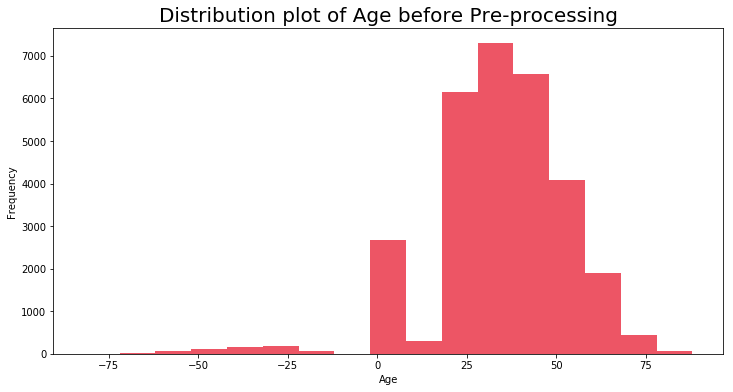

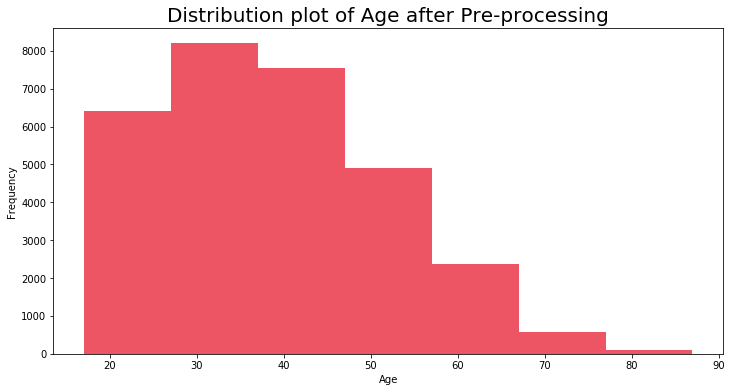

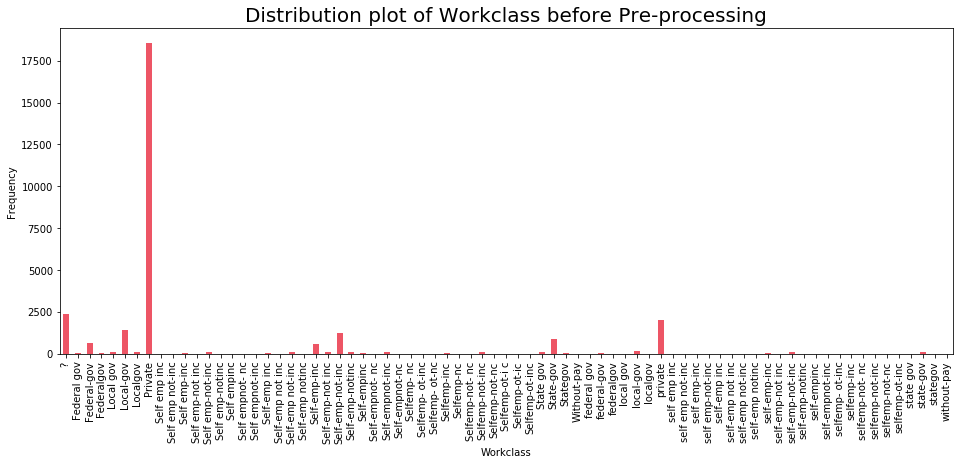

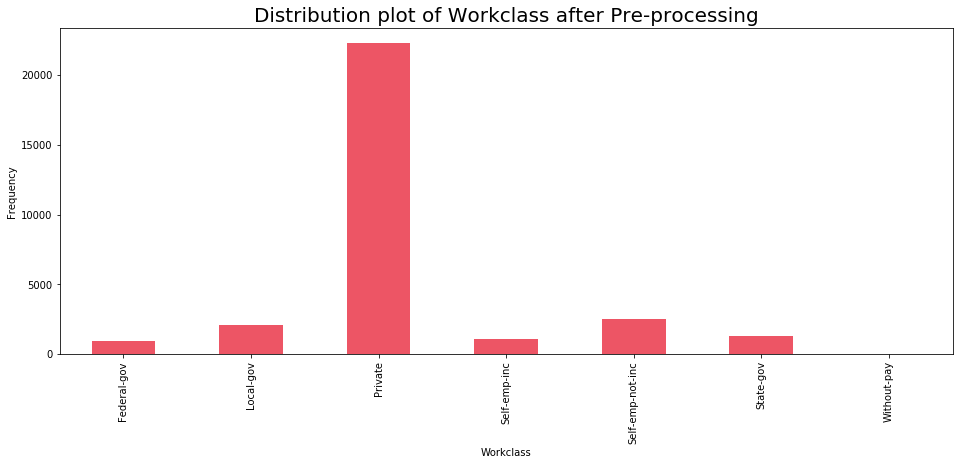

False


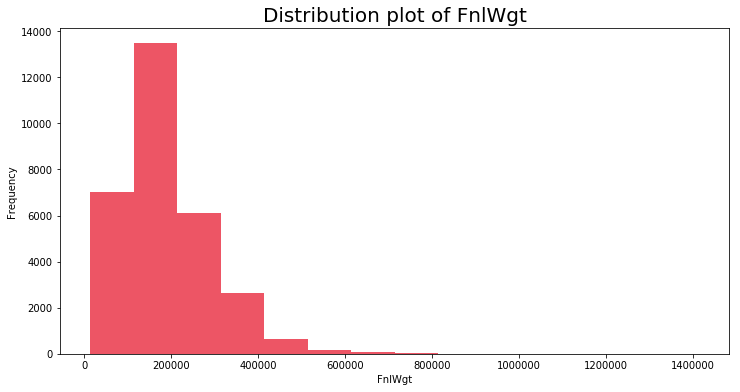

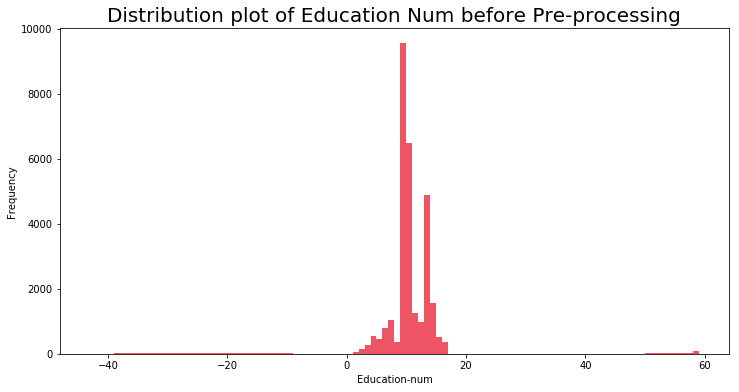

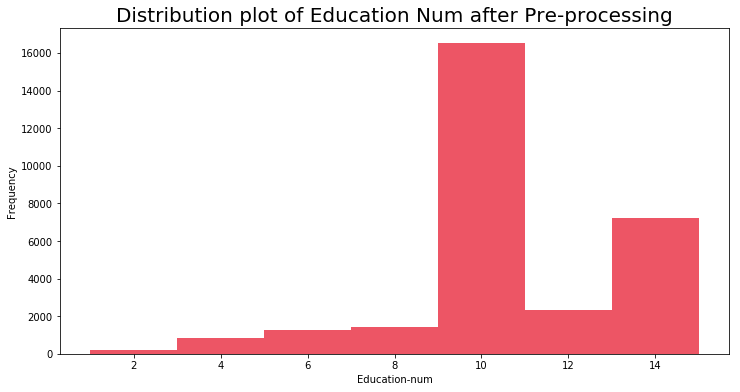

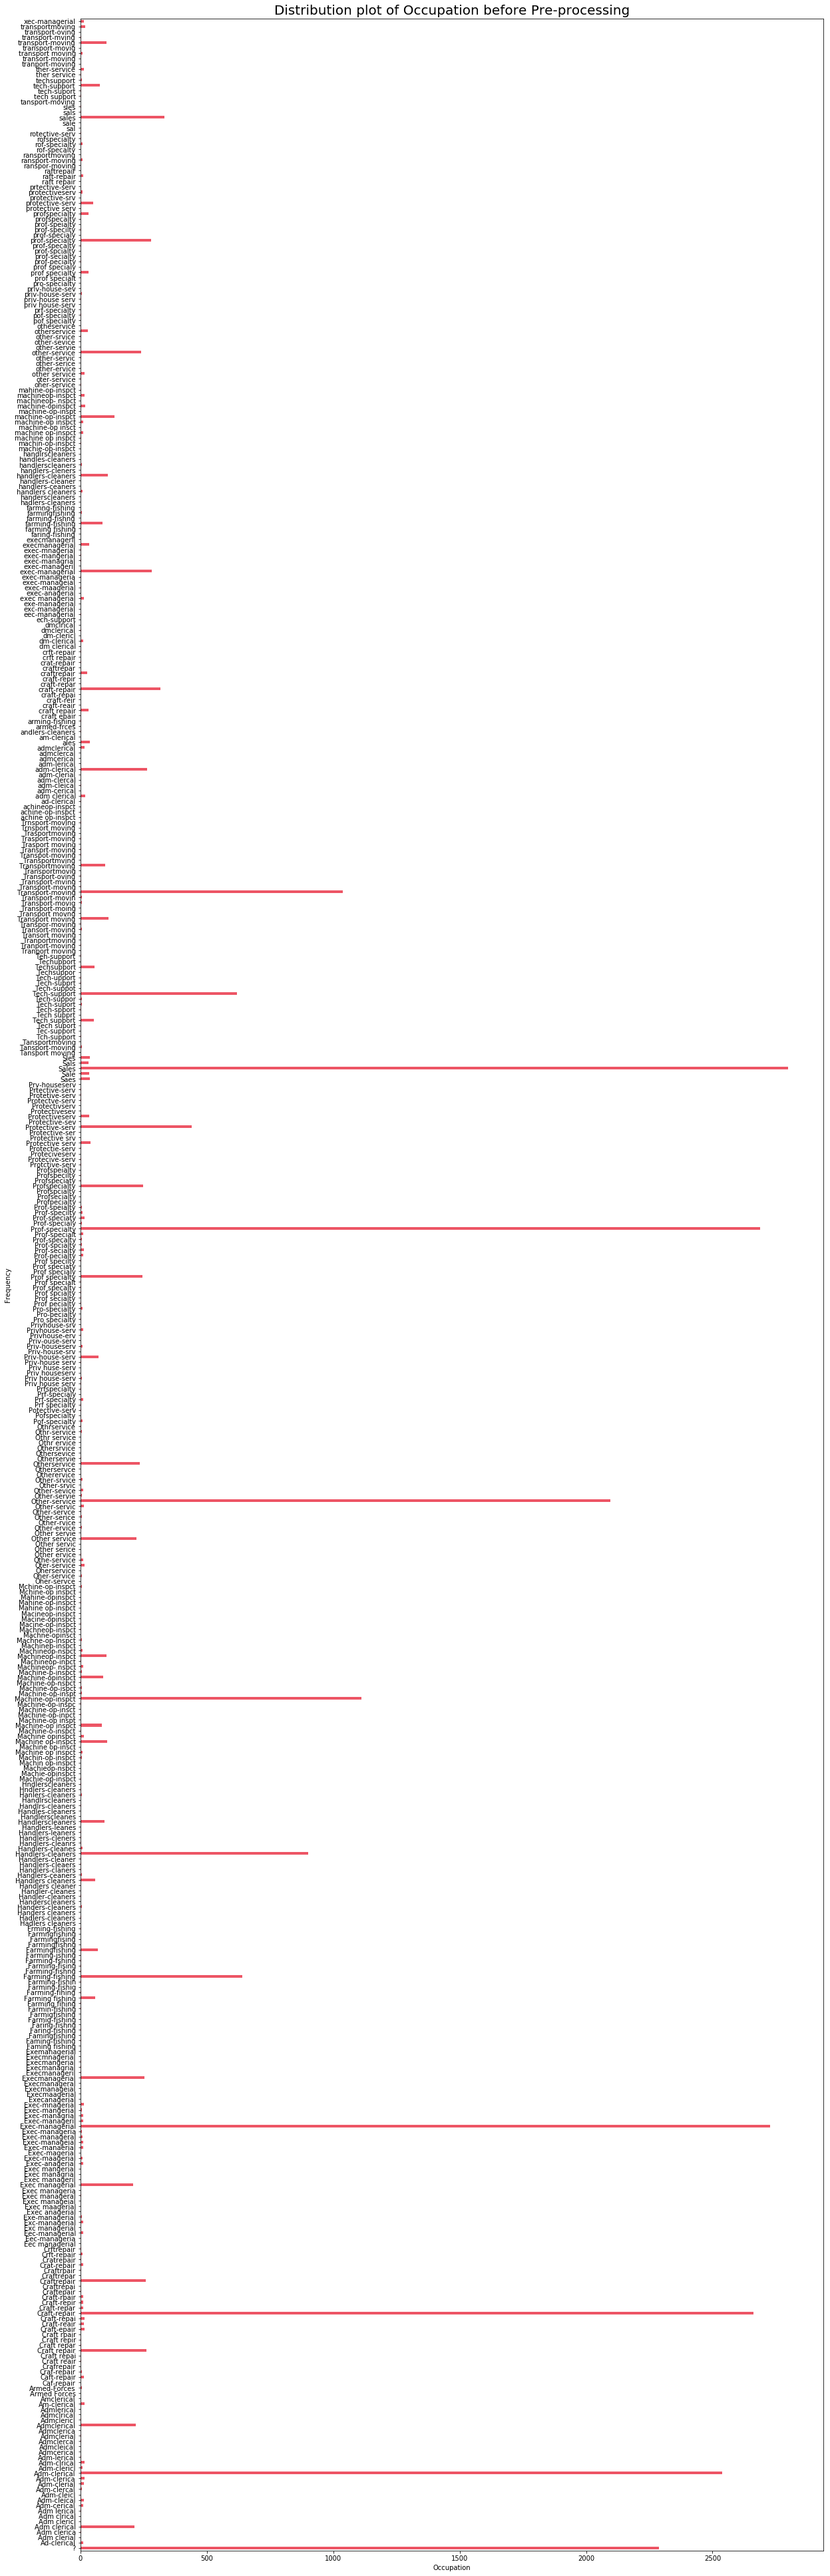

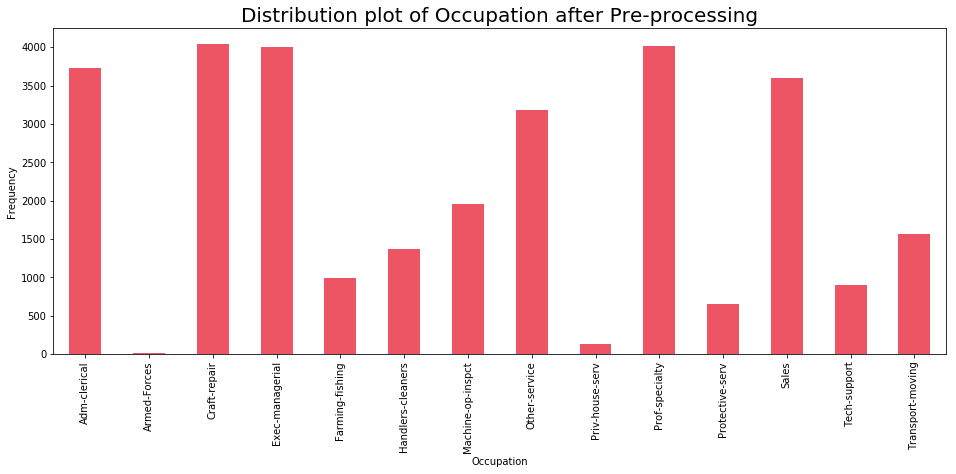

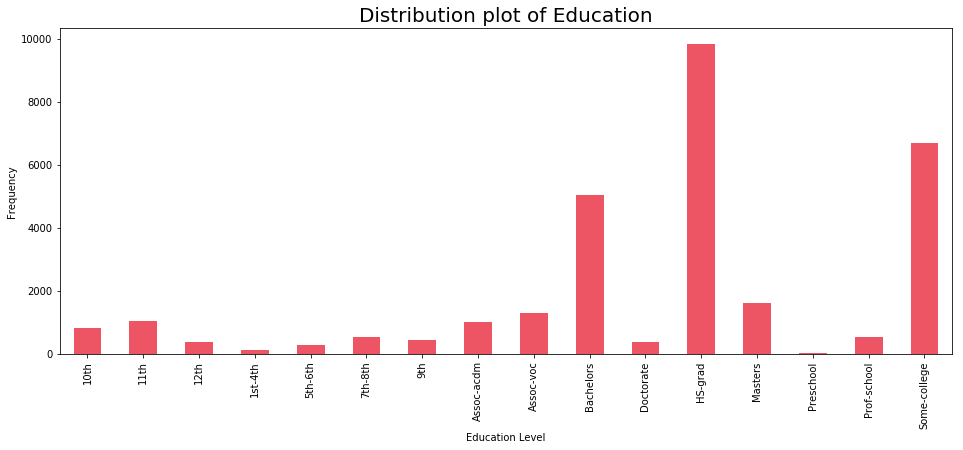

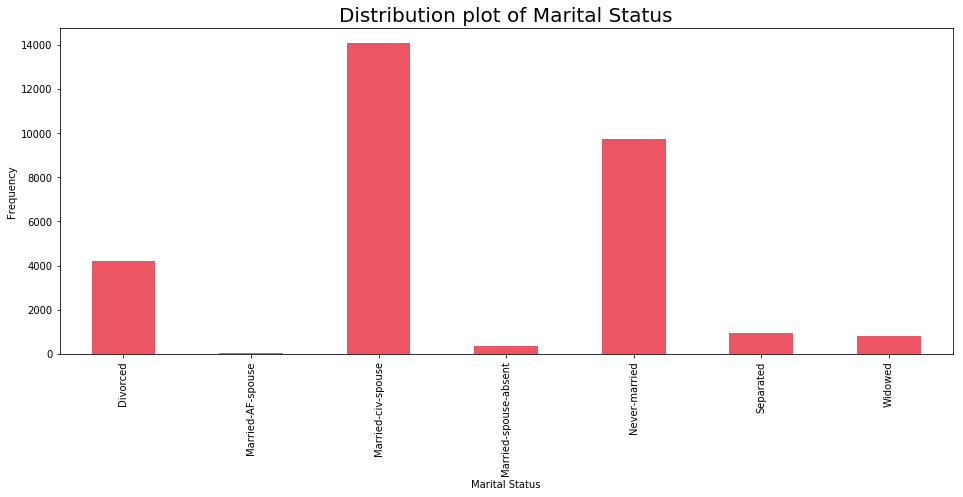

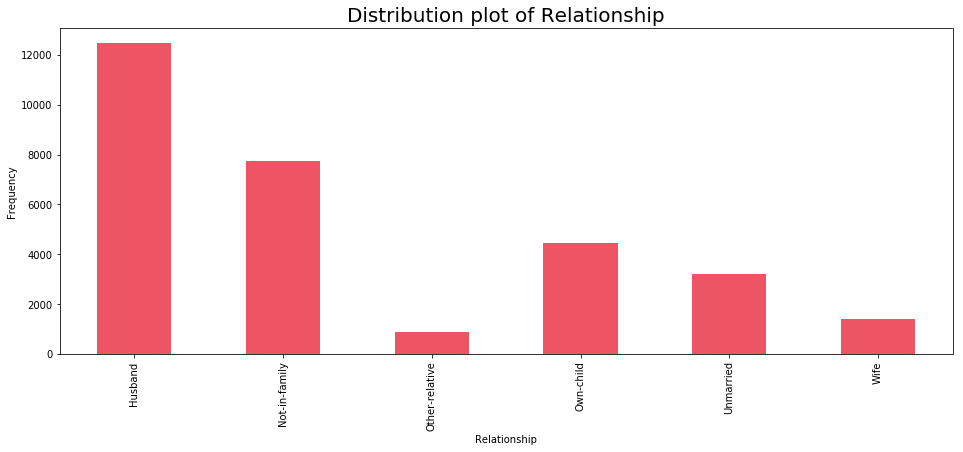

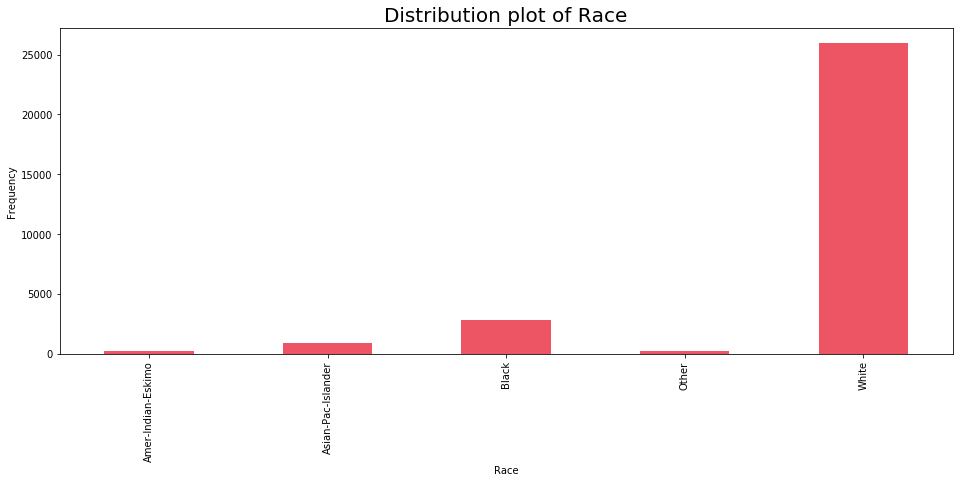

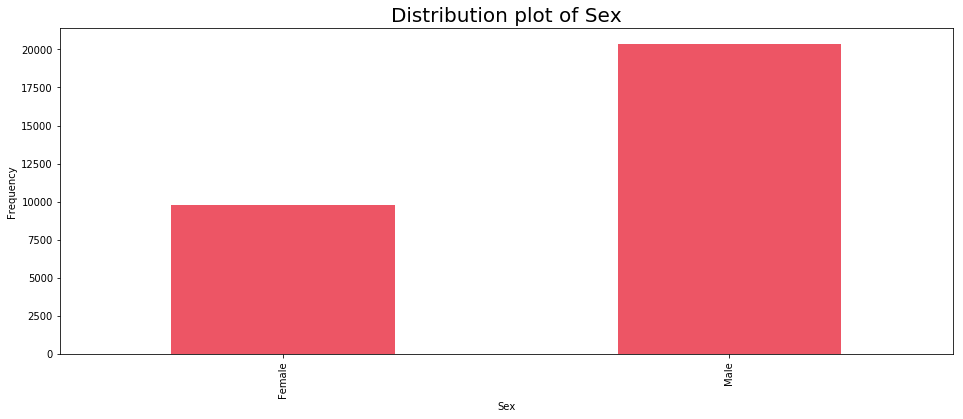

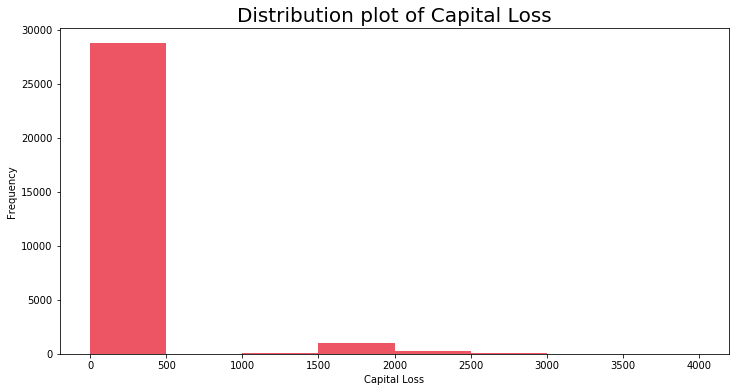

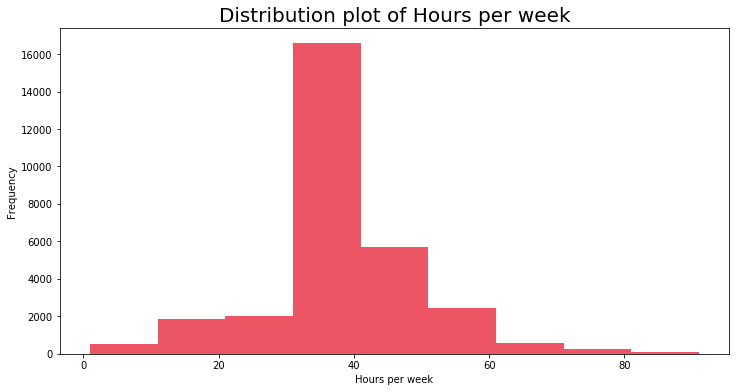

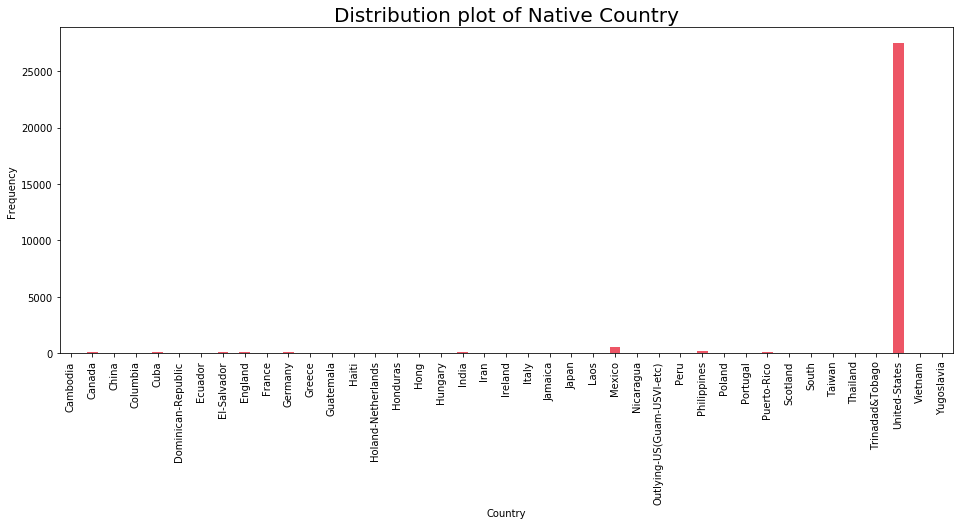

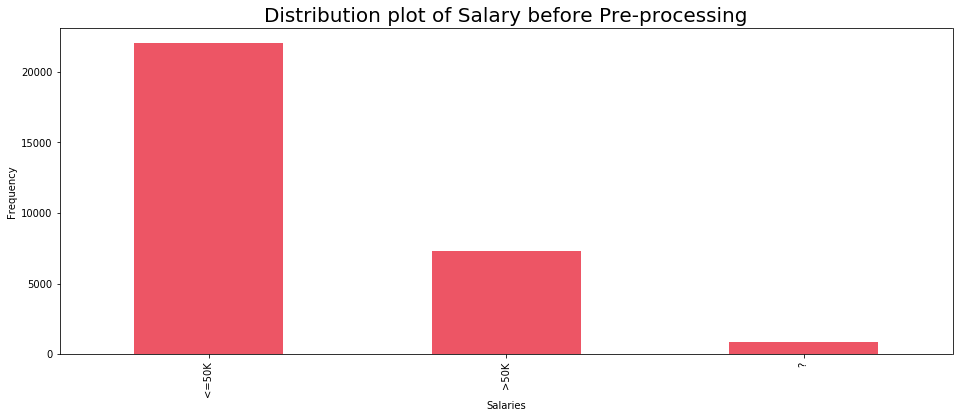

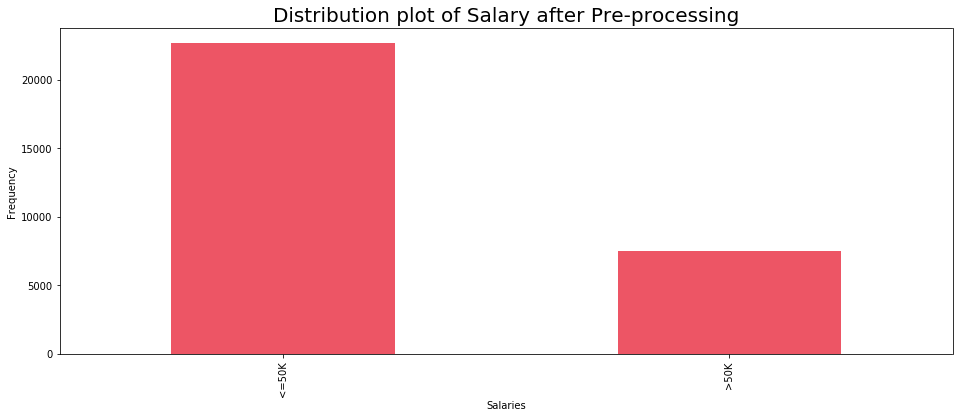

In [15]:
if __name__ == "__main__":
    main()